In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("E:\\dataset\\Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
print(df.info)

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [6]:
df['Gender'] = df['Gender'].map({'Male':0 , 'Female':1})

In [7]:
df['Purchased'] = (df['Spending Score (1-100)'] > 50).astype(int)

In [8]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Purchased
0,1,0,19,15,39,0
1,2,0,21,15,81,1
2,3,1,20,16,6,0
3,4,1,23,16,77,1
4,5,1,31,17,40,0


In [9]:
X = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
y = df['Purchased']

In [10]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 , test_size = 0.2)
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train , y_train)

DecisionTreeClassifier()

In [11]:
y_pred = model.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test , y_pred)
classification_report = classification_report(y_test , y_pred)
confusion_matrix = confusion_matrix(y_test , y_pred)


print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [13]:
print('Classification Report:')
print(classification_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        17

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [14]:
print('Confusion Matrix:')
print(confusion_matrix)

Confusion Matrix:
[[23  0]
 [ 0 17]]


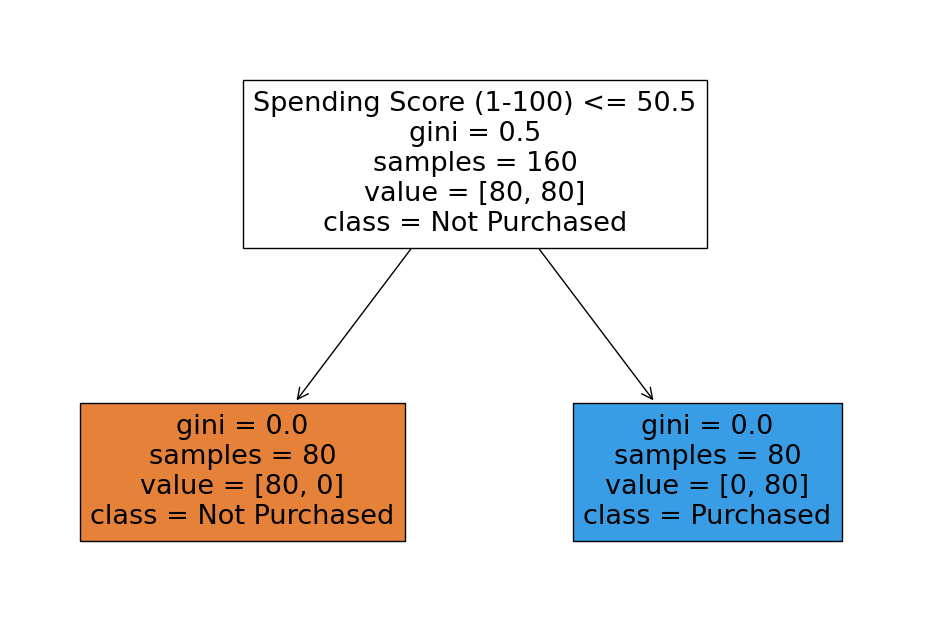

In [15]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], class_names=['Not Purchased', 'Purchased'], filled=True)
plt.show()
